<a href="https://colab.research.google.com/github/rkrmishra/DIPA/blob/main/DIPA_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

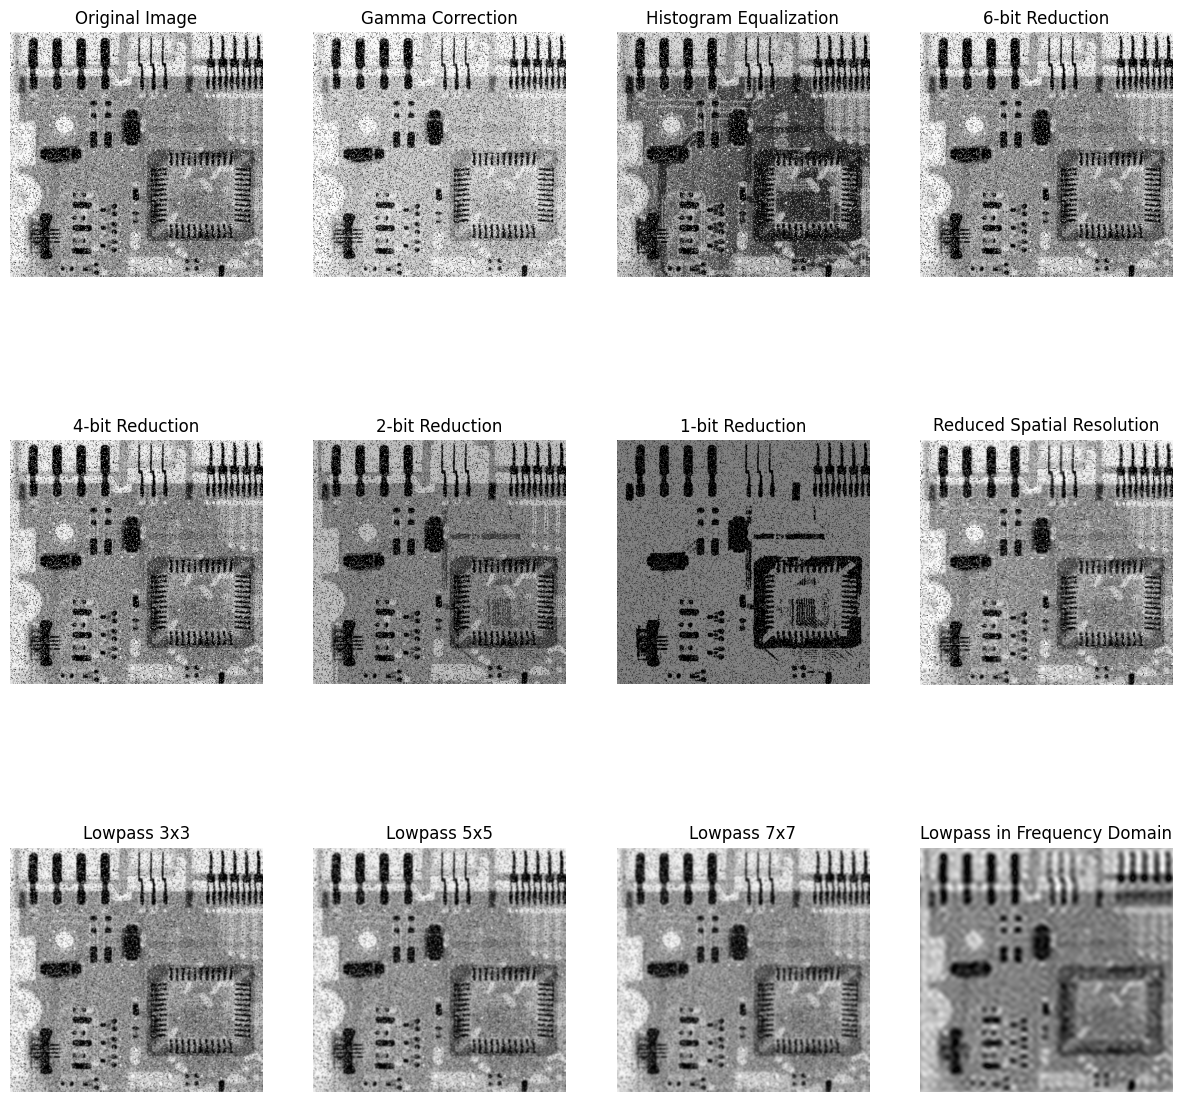


********************************************************************************************************************************************
********************************************************************************************************************************************



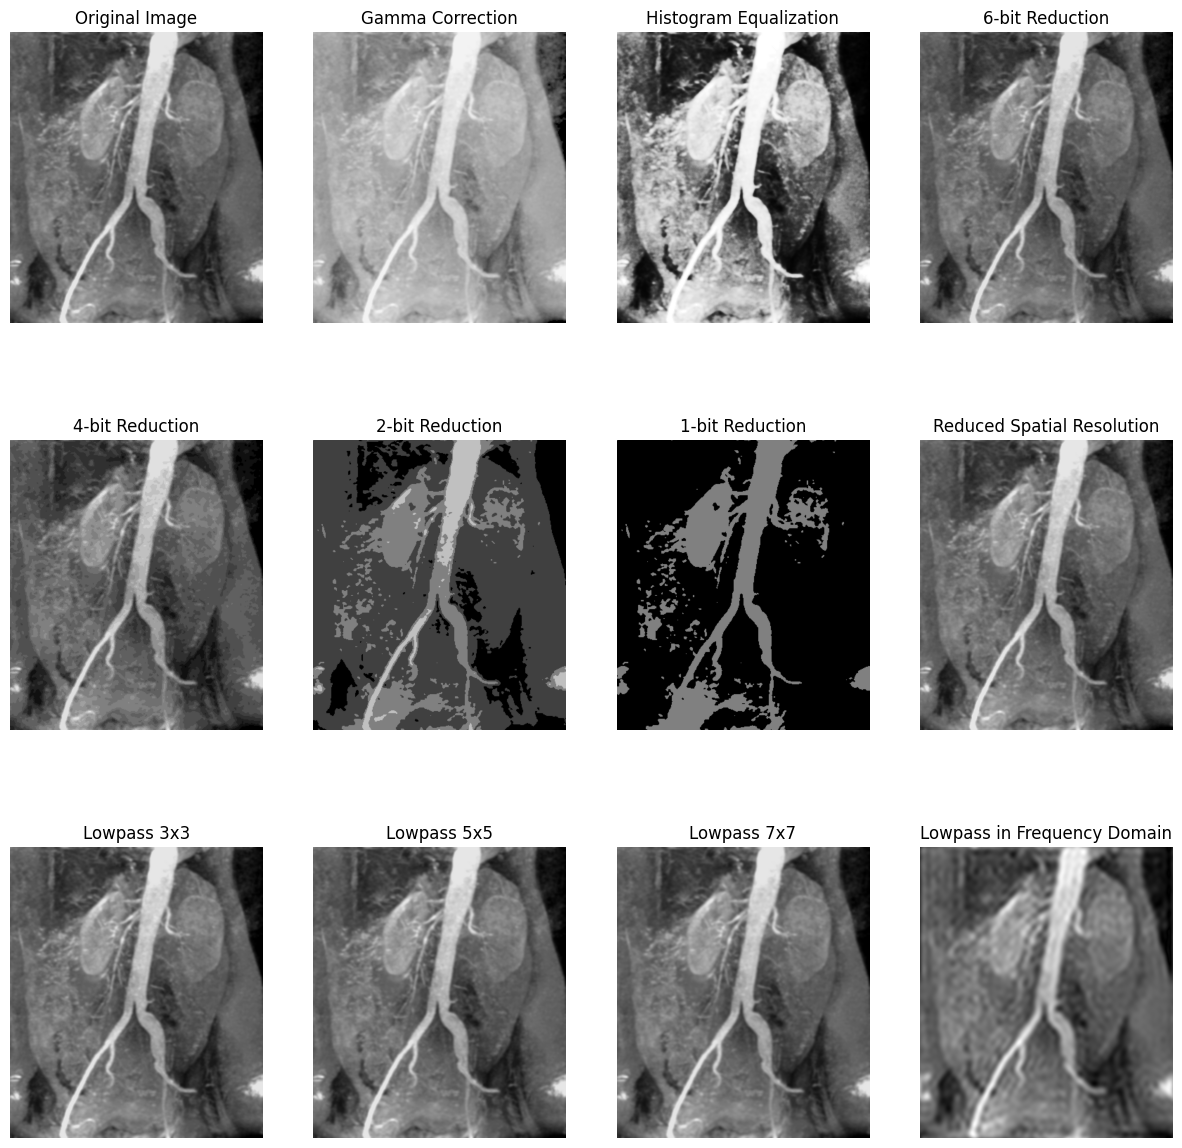


********************************************************************************************************************************************
********************************************************************************************************************************************



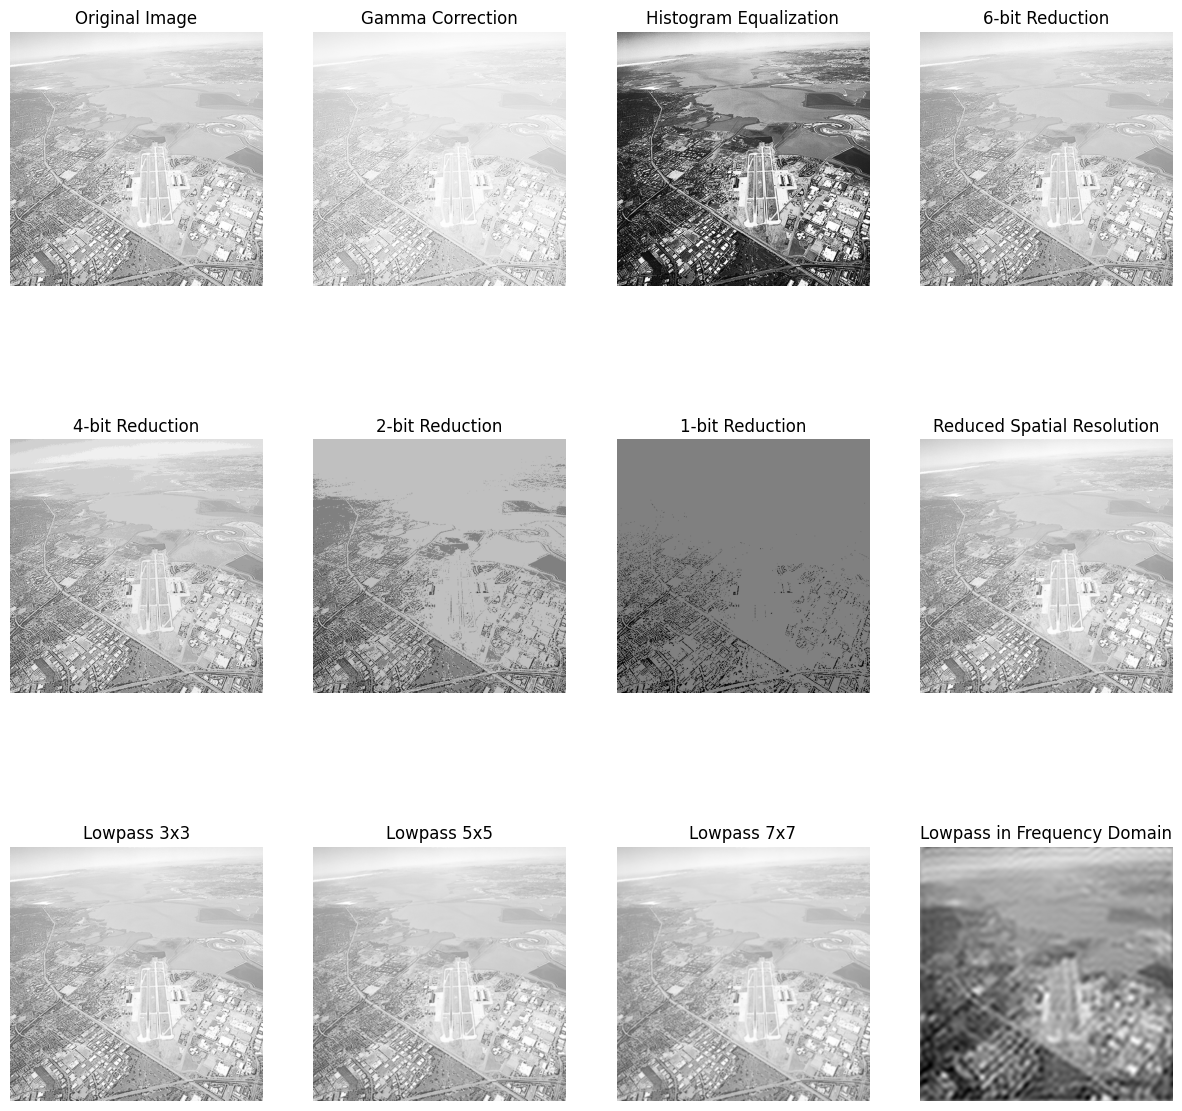


********************************************************************************************************************************************
********************************************************************************************************************************************



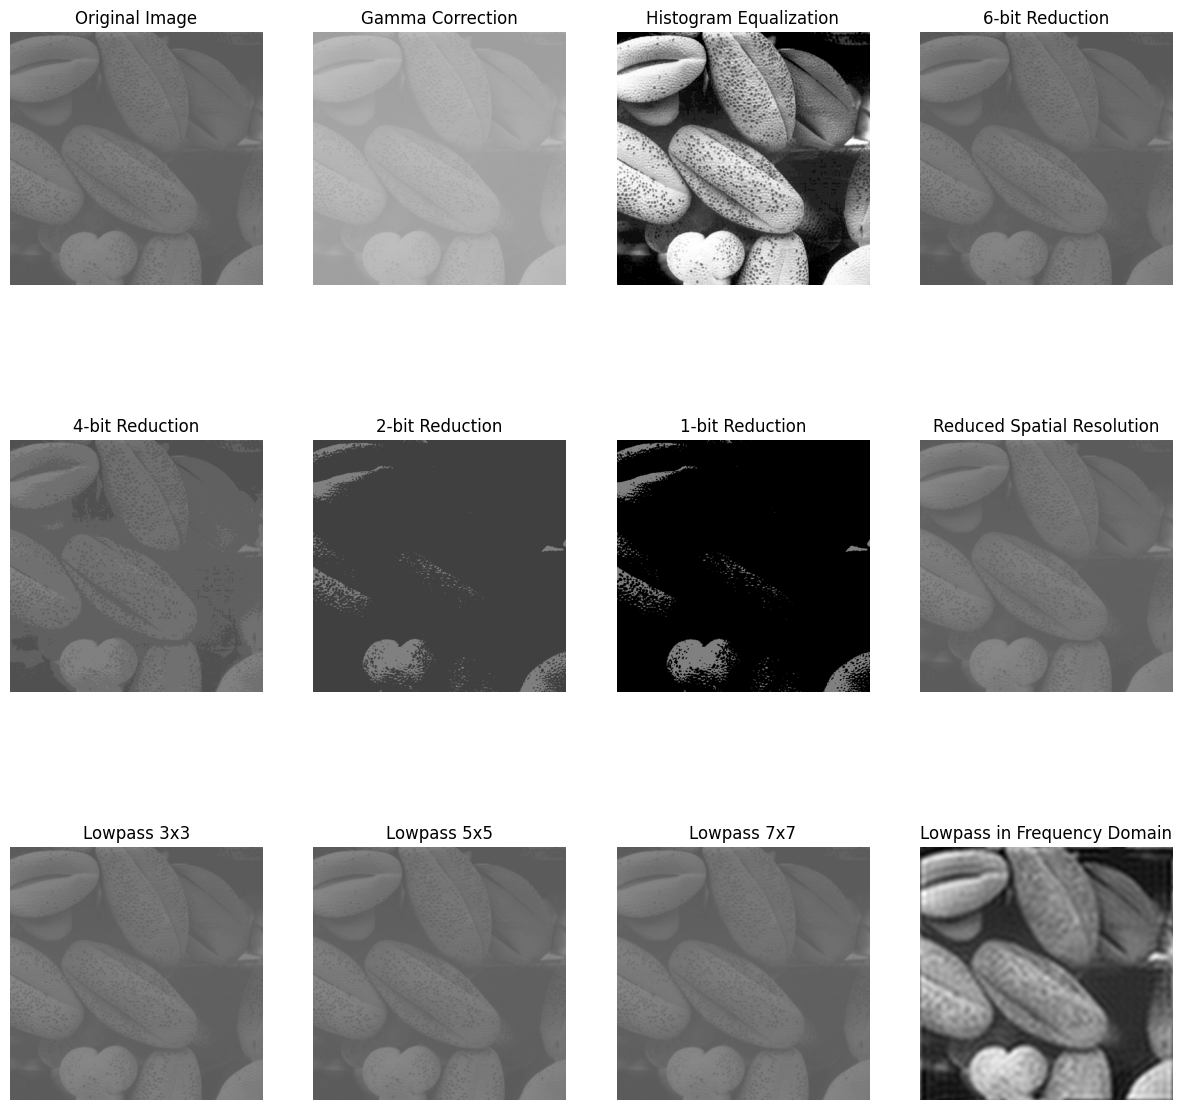


********************************************************************************************************************************************
********************************************************************************************************************************************



In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def histogram_equalization(image):
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)
    elif len(image.shape) == 3:
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def reduce_bit_depth(image, bit_depth):
    levels = 2 ** bit_depth
    factor = 256 // levels
    return (image // factor) * factor

def reduce_spatial_resolution(image):
    h, w = image.shape[:2]
    resized = cv2.resize(image, (w // 2, h // 2), interpolation=cv2.INTER_AREA)
    return resized

def apply_lowpass_filter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def lowpass_frequency_filter(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = gray.shape
    mask = np.zeros((rows, cols), np.uint8)
    center_x, center_y = cols // 2, rows // 2
    mask[center_y - 30:center_y + 30, center_x - 30:center_x + 30] = 1
    dft_shift_filtered = dft_shift * mask
    dft_filtered = np.fft.ifftshift(dft_shift_filtered)
    img_filtered = np.fft.ifft2(dft_filtered)
    return np.abs(img_filtered)

# Load the image
image_path = ['/content/ckt.pgm',
               '/content/kidney.pgm',
               '/content/washed_out_aerial.pgm',
               '/content/washed_out_pollen_image.pgm']


def plot_images(row, col, axes, image_list):
    list_of_titles = ['Original Image',
                    'Gamma Correction',
                    'Histogram Equalization',
                    '6-bit Reduction',
                    '4-bit Reduction',
                    '2-bit Reduction',
                    '1-bit Reduction',
                    'Reduced Spatial Resolution',
                    'Lowpass 3x3',
                    'Lowpass 5x5',
                    'Lowpass 7x7',
                    'Lowpass in Frequency Domain']
    list_counter = 0
    for i in range(row):
        for j in range(col):
            if list_counter == 11:
                axes[i, j].imshow(image_list[list_counter], cmap='gray')
            else:
                axes[i, j].imshow(cv2.cvtColor(image_list[list_counter], cv2.COLOR_BGR2RGB))
            axes[i, j].set_title(list_of_titles[list_counter])
            list_counter += 1
            axes[i, j].axis('off')
    plt.show()



def load_image(image_path):
    image = cv2.imread(image_path)
    gamma_corrected = gamma_correction(image, 2.2)
    hist_eq = histogram_equalization(image)
    bit_depth_6 = reduce_bit_depth(image, 6)
    bit_depth_4 = reduce_bit_depth(image, 4)
    bit_depth_2 = reduce_bit_depth(image, 2)
    bit_depth_1 = reduce_bit_depth(image, 1)
    resized_image = reduce_spatial_resolution(image)
    lowpass_3x3 = apply_lowpass_filter(image, 3)
    lowpass_5x5 = apply_lowpass_filter(image, 5)
    lowpass_7x7 = apply_lowpass_filter(image, 7)
    lowpass_freq = lowpass_frequency_filter(image)
    return [image, gamma_corrected, hist_eq, bit_depth_6, bit_depth_4, bit_depth_2, bit_depth_1, resized_image, lowpass_3x3, lowpass_5x5, lowpass_7x7, lowpass_freq]


for image in image_path:
    row, col = 3, 4
    plot_dimention = 15
    fig, axes = plt.subplots(row, col, figsize=(plot_dimention, plot_dimention))
    image_list = load_image(image)
    plot_images(row, col, axes, image_list)
    print()
    print("*" * 140)
    print("*" * 140)
    print()

